In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def read_file(filename):
    with open(filename, 'r',encoding='utf-8') as f:
        return f.read()

In [4]:
positive_rev = read_file('TrainingDataPositive.txt')
negative_rev = read_file('TrainingDataNegative.txt')

In [5]:
documents = [positive_rev, negative_rev]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [7]:
tfidf_matrix = tfidf.fit_transform(documents)

In [8]:
features_name = tfidf.get_feature_names_out()

In [10]:
df = pd.DataFrame(tfidf_matrix.toarray(), columns=features_name, index=['Positive', 'Negative'])

In [19]:
df.head()

,00,000,000s,001cc4c002e0,00am,00fried,00grilled,00hungarian,00mushroom,00noodlessaimen,...,zuericher,zulu,zumanity,zumba,zupa,zuppa,zur,zurich,zz,zzzz
Positive,0.006180,0.001288,0.000000,0.00009,0.000193,0.00009,0.00009,0.00009,0.00009,0.00009,...,0.00009,0.00009,0.00009,0.001267,0.00009,0.000181,0.000451,0.00009,0.00009,0.00009
Negative,0.011736,0.001100,0.000172,0.00000,0.000367,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000245,0.00000,0.00000,0.00000


In [20]:
def display_top_terms(document_type):
    print(f"\nTop 10 terms for {document_type} reviews:")
    top_terms = df.loc[document_type].sort_values(ascending=False).head(10)
    for term, score in top_terms.items():
        print(f"{term}: {score:.4f}")

display_top_terms('Positive')
display_top_terms('Negative')

diff = df.loc['Positive'] - df.loc['Negative']
print("\nTerms with highest absolute difference in TF-IDF scores:")
print(diff.abs().sort_values(ascending=False).head(10))


Top 10 terms for Positive reviews:
place: 0.3178
food: 0.3089
great: 0.2997
good: 0.2446
like: 0.1995
just: 0.1792
time: 0.1615
best: 0.1465
love: 0.1412
ve: 0.1404

Top 10 terms for Negative reviews:
food: 0.3863
place: 0.2575
like: 0.2364
just: 0.2122
service: 0.1792
time: 0.1763
good: 0.1732
restaurant: 0.1350
don: 0.1268
got: 0.1216

Terms with highest absolute difference in TF-IDF scores:
great        0.243554
love         0.118314
best         0.108434
said         0.085510
delicious    0.082098
amazing      0.079360
asked        0.078882
food         0.077378
minutes      0.076166
didn         0.073994
dtype: float64


In [23]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.readlines()

# Read the training files
positive_reviews = read_file('TrainingDataPositive.txt')
negative_reviews = read_file('TrainingDataNegative.txt')

In [24]:
train_reviews = positive_reviews + negative_reviews
train_labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

vectorizer = TfidfVectorizer()
train_tfidf_matrix = vectorizer.fit_transform(train_reviews)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [26]:
model = LogisticRegression()
model.fit(train_tfidf_matrix, train_labels)

LogisticRegression()

In [27]:
test_data = pd.read_csv('TestReviews.csv')

In [28]:
test_reviews = test_data['review'].tolist()
test_labels = test_data['class'].tolist()

In [29]:
test_tfidf_matrix = vectorizer.transform(test_reviews)

predictions = model.predict(test_tfidf_matrix)

In [32]:
print("Classification Report:")
print(classification_report(test_labels, predictions, target_names=['Negative', 'Positive']))
print(f"Accuracy: {accuracy_score(test_labels, predictions):.2f}")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.96      0.83      0.89      1332
    Positive       0.93      0.98      0.95      2989

    accuracy                           0.93      4321
   macro avg       0.94      0.90      0.92      4321
weighted avg       0.94      0.93      0.93      4321

Accuracy: 0.93


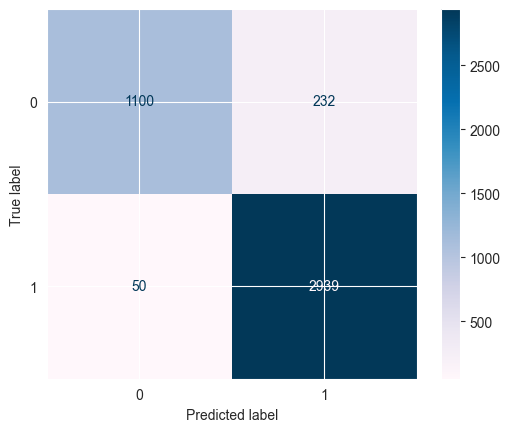

In [41]:
ConfusionMatrixDisplay.from_predictions(test_labels, predictions,cmap='PuBu')

In [43]:
def get_top_features(vectorizer, model, class_label, n=10):
    feature_importance = model.coef_[0]
    if class_label == 0: 
        feature_importance = -feature_importance
    top_indices = np.argsort(feature_importance)[-n:]
    top_features = [(vectorizer.get_feature_names_out()[i], feature_importance[i]) for i in top_indices[::-1]]
    return top_features


print("\nTop features for Positive class:")
for feature, importance in get_top_features(vectorizer, model, 1):
    print(f"{feature}: {importance:.4f}")

print("\nTop features for Negative class:")
for feature, importance in get_top_features(vectorizer, model, 0):
    print(f"{feature}: {importance:.4f}")



Top features for Positive class:
great: 7.9223
love: 5.6638
best: 5.5769
amazing: 5.4871
delicious: 5.2311
friendly: 4.6116
excellent: 4.3667
and: 4.0835
awesome: 3.6895
fantastic: 3.3814

Top features for Negative class:
not: 8.0907
worst: 5.3781
no: 4.8594
horrible: 4.7149
rude: 4.3677
bad: 4.2201
bland: 3.9082
poor: 3.8170
terrible: 3.5910
awful: 3.3600


In [44]:
def classify_review(review):
    tfidf_vector = vectorizer.transform([review])
    prediction = model.predict(tfidf_vector)[0]
    probability = model.predict_proba(tfidf_vector)[0]
    return "Positive" if prediction == 1 else "Negative", probability


example_review = test_reviews[0]
classification, probabilities = classify_review(example_review)
print(f"\nExample review: '{example_review[:100]}...'")  

print(f"True class: {'Positive' if test_labels[0] == 1 else 'Negative'}")
print(f"Predicted class: {classification}")
print(f"Probabilities: Negative: {probabilities[0]:.2f}, Positive: {probabilities[1]:.2f}")


Example review: 'Fantastic spot for an even or a quite cocktail.  They were swell to host the Yelp crew with a great ...'
True class: Positive
Predicted class: Positive
Probabilities: Negative: 0.02, Positive: 0.98


In [45]:
import joblib
joblib.dump(model, 'model.pkl')

In [46]:
joblib.dump(model, 'model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
